### Taylor series

$$f(x)=\sum_{k=0}^\infty f^{(k)}(a)\frac{(x-a)^k}{k!}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 1.1 Example: Exponential function

In [2]:
def expTaylor(x, x0, nmax):
    # x: argument of the function
    # x0: Arugument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    t = 0
    for n in range(nmax + 1):
        t = t + np.exp(x0) * (x-x0)**n / np.math.factorial(n)
    return t



In [3]:
expTaylor(1, 0, 10)

2.7182818011463845

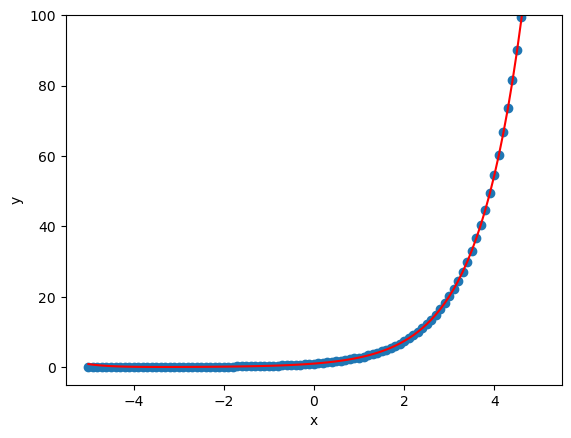

In [4]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5, 100])

x_list = np.linspace(-5, 5, 101)
plt.scatter(x_list, np.exp(x_list))

nmax = 10
plt.plot(x_list, expTaylor(x_list, 0, nmax), 'red')

#### 1.2 Example: sin function at x0 = 0

In [5]:
def sinTaylor(x, nmax):
    # x: Argument
    # x0: taylor series around 0
    # nmax: n at which the series will terminate

    t = 0
    for n in range(nmax + 1):
        t = t + (-1)**n * x**(2*n + 1) / np.math.factorial(2*n + 1)

    return t

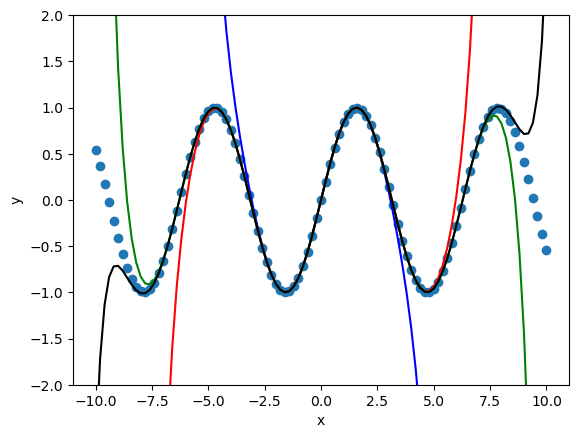

In [6]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2, 2])

x_list = np.linspace(-10, 10, 101)
plt.scatter(x_list, np.sin(x_list))

plt.plot(x_list, sinTaylor(x_list, 3), 'blue')
plt.plot(x_list, sinTaylor(x_list, 6), 'red')
plt.plot(x_list, sinTaylor(x_list, 9), 'green')
plt.plot(x_list, sinTaylor(x_list, 10), 'black')

#### 1.3 Implementation of a general function

##### Derivative: f'(x) = lim_(h->0) f(x+h) - f(x) / h

In [7]:
def derivative(f, x, h):
    # f: function
    # x: argument of f
    # h: stepsize

    return (f(x + h) - f(x)) / h

In [8]:
def func(x):
    return 2*np.sin(x)**2 + x

In [9]:
x0 = 10.5
h = 0.1
func(x0)
derivative(func, x0, h)

2.5529969724111723

In [10]:
def nDerivative(f, x, h, n):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    # n: nth derivative

    t = 0
    for k in range(0, n + 1):
        t = t + (-1)**(k + n) * np.math.factorial(n) / (np.math.factorial(n - k) * np.math.factorial(k)) * f(x + k*h)
    return t / h**n

In [11]:
nDerivative(func, x0, h, 2)

-2.802754599797907

In [12]:
def taylor(f, x, x0, nmax, h):
    # f: Function
    # x: Arguments
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    # h: stepsize

    t = 0 
    for n in range(nmax + 1):
        t = t + nDerivative(f, x0, h, n) * (x - x0)**n / np.math.factorial(n)
    return t

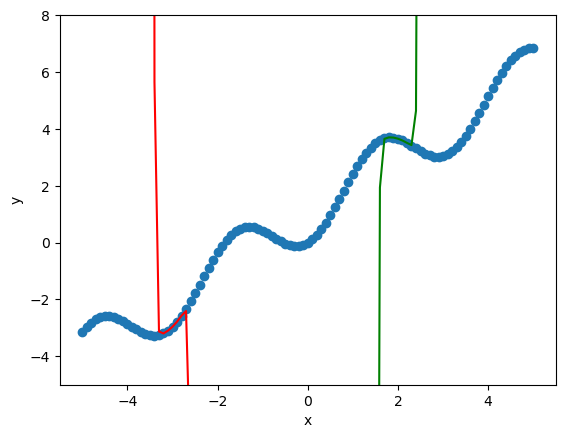

In [13]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5, 8])

x_list = np.linspace(-5, 5, 101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.01

plt.plot(x_list, taylor(func, x_list, 2, nmax, h), 'green')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), 'red')

### 2.1 Generate data points

In [14]:
def correctFunction(x):
    return 15 + 2.4 * x - 0.5 * x**2 - 0.35 * x**3

In [15]:
npoints = 21
x_list = np.linspace(-5, 5, npoints)
data0 = np.array([x_list, correctFunction(x_list)])


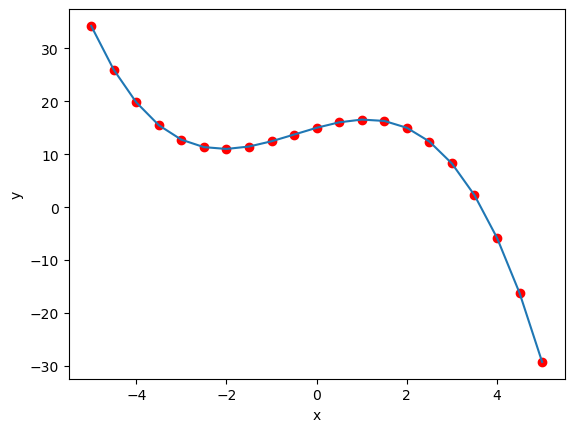

In [16]:
plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1])
plt.scatter(data0[0], data0[1], c='r')

#### Modify x and y values by adding random numbers

In [17]:
data = np.array([data0[0] + 0.25 * (2*np.random.rand(npoints) - 1), data0[1] + 5.0 * (2*np.random.rand(npoints) - 1)])

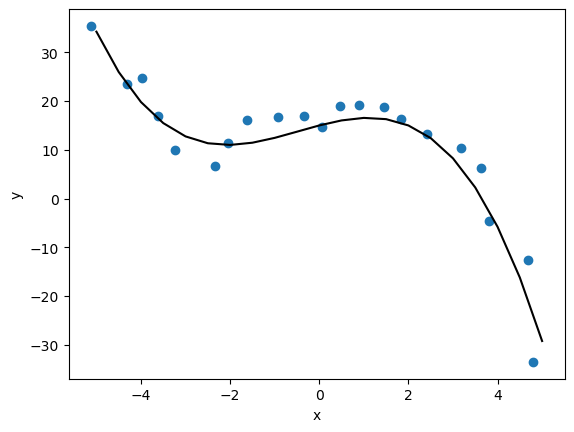

In [18]:
plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1], 'black')
plt.scatter(data[0], data[1])

#### 2.2 Spline Interpolation

##### A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubis spline is used

##### The spline is defined piecewise

#### 2.2.1 Unperturbed data

In [19]:
from scipy import interpolate

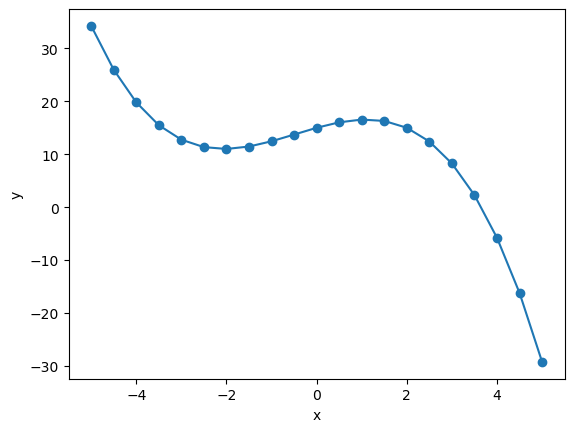

In [20]:
# Linear splines

splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind = 'linear')

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))

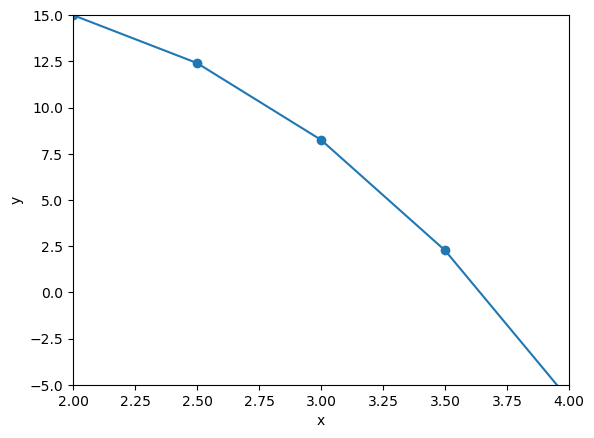

In [21]:
# Zoom

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2, 4])
plt.ylim([-5, 15])
plt.scatter(data0[0], data0[1])

plt.plot(data0[0], splineLinear0(data0[0]))

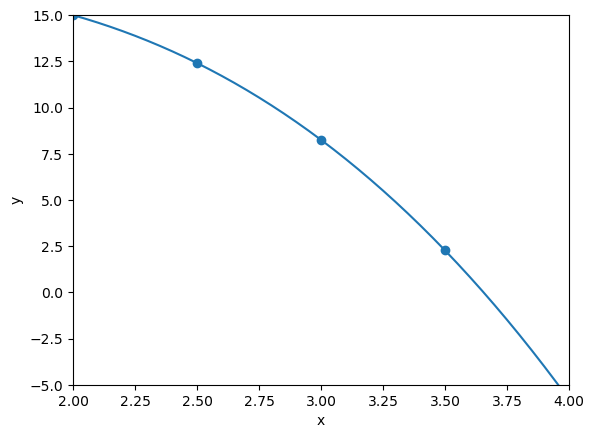

In [22]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2, 4])
plt.ylim([-5, 15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2, 4, 201)
plt.plot(x_list, splineCubic0(x_list))

#### 2.2.2 Perturbed data

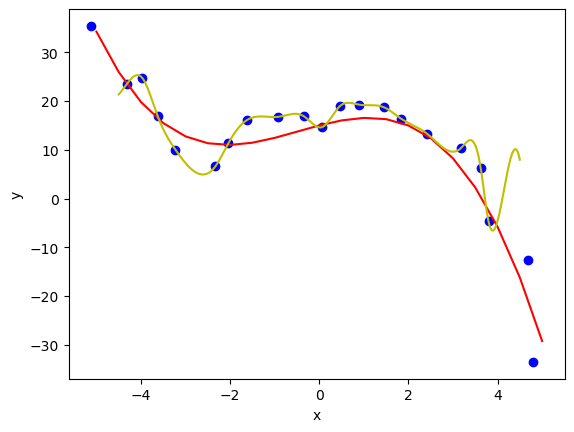

In [23]:
splineCubic = interpolate.interp1d(data[0], data[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.plot(data0[0], data0[1], c='r')

x_list = np.linspace(-4.5, 4.5, 901)
plt.scatter(data[0], data[1], c='b')
plt.plot(x_list, splineCubic(x_list), 'y')

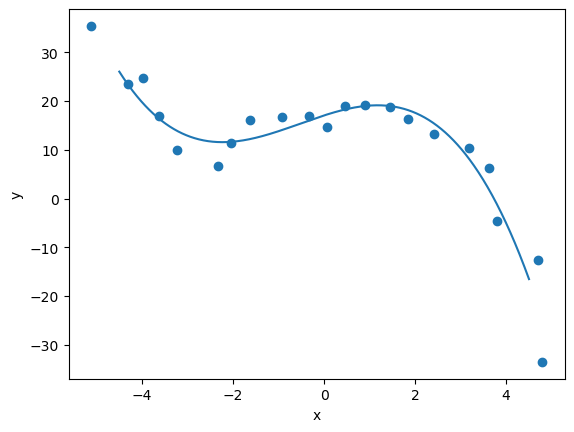

In [24]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
# adding the smoothing factor
splineSmooth.set_smoothing_factor(500)

plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-4.5, 4.5, 901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineSmooth(x_list))

### Add-on: How you can always fit data with a polynomial

In [25]:
datapoly = data[:, 7:14]

In [26]:
datapoly

array([[-1.63195231, -0.92254202, -0.34076425,  0.06621559,  0.45812408,
         0.89027663,  1.45653062],
       [16.0509133 , 16.76667503, 16.85376008, 14.66197695, 18.92243668,
        19.27067247, 18.70694506]])

In [27]:
x = np.transpose(
    np.array([datapoly[0, :]**0, datapoly[0,:]**1, datapoly[0,:]**2, datapoly[0,:]**3, datapoly[0,:]**4, datapoly[0,:]**5, datapoly[0,:]**6]))

x

array([[ 1.00000000e+00, -1.63195231e+00,  2.66326836e+00,
        -4.34632696e+00,  7.09299834e+00, -1.15754350e+01,
         1.88905580e+01],
       [ 1.00000000e+00, -9.22542022e-01,  8.51083783e-01,
        -7.85160554e-01,  7.24343605e-01, -6.68237415e-01,
         6.16477096e-01],
       [ 1.00000000e+00, -3.40764251e-01,  1.16120274e-01,
        -3.95696383e-02,  1.34839181e-02, -4.59483726e-03,
         1.56575627e-03],
       [ 1.00000000e+00,  6.62155899e-02,  4.38450434e-03,
         2.90322541e-04,  1.92238783e-05,  1.27292044e-06,
         8.42871780e-08],
       [ 1.00000000e+00,  4.58124082e-01,  2.09877675e-01,
         9.61500170e-02,  4.40486383e-02,  2.01797420e-02,
         9.24482578e-03],
       [ 1.00000000e+00,  8.90276628e-01,  7.92592475e-01,
         7.05626556e-01,  6.28202832e-01,  5.59274299e-01,
         4.97908837e-01],
       [ 1.00000000e+00,  1.45653062e+00,  2.12148146e+00,
         3.09000272e+00,  4.50068359e+00,  6.55538347e+00,
         9.5481167

In [28]:
y = datapoly[1, :]

In [29]:
a = np.linalg.solve(x, y)
a

array([ 14.48911137,   0.86424295,  26.60059978,  -1.06151942,
       -35.67871162,   1.54040766,  10.50333663])

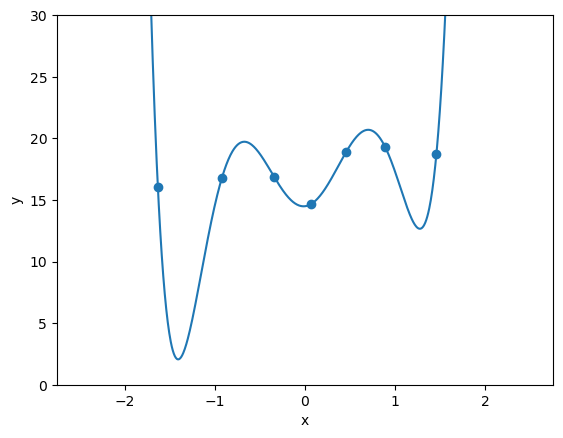

In [30]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0, 30])

x_list = np.linspace(-2.5, 2.5, 901)
y_list = a[0]*x_list**0 + a[1]*x_list**1 + a[2]*x_list**2 + a[3]*x_list**3 + a[4]*x_list**4 + a[5]*x_list**5 + a[6]*x_list**6
plt.scatter(datapoly[0], datapoly[1])
plt.plot(x_list, y_list)

### 2.3 Fitting a Model Function

### For practice, we consider a polynomial: $$ f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k$$

In [32]:
def polynomialModel(x, a):
    t = 0 
    for k in range(len(a)):
        t += a[k] * x**k

    return t

In [33]:
a0 = np.array([-2, 2.4, -0.5, -0.35])

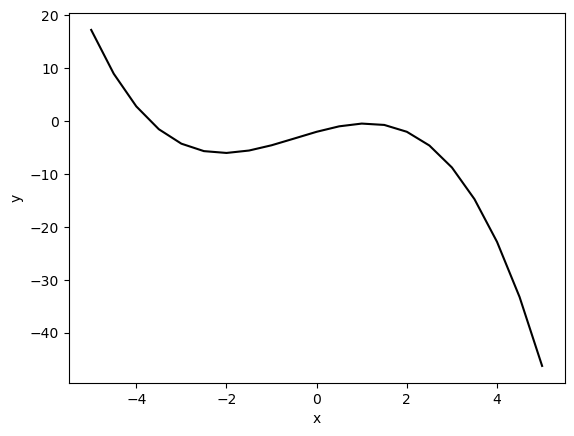

In [35]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a0), 'black')

#### There are many reasonable definitions of an error function but a very common choice is: $$ \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2$$

#### $$ f $$ is the fit function that is determined by the coefficients $$ a_i $$ in our case.

#### $$ (x_i, y_i) $$ are the data points that we try to fit.

In [ ]:
def errorFit(f, coefficients, data):
    # f: The fit function
    # coefficients: ai that we try to optimize
    # data: The data we try to fit

    error = 0
    for i in range(len(data[0])):
        error += (data[1, i] - f(data[0, i], coefficients))**2

    return error

$$ \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k})$$

In [ ]:
def errorFitGradient(f, coefficient, data):
    # f: The fit function
    # coefficients: ai that we try to optimize
    # data: The data we try to fit
    return -2 * np.array([
        np.sum(np.array([... for i in range(len[data[0]])]))
    ])